In [348]:
import numpy as np
import matplotlib.pyplot as plt

In [349]:
import numpy as np
import matplotlib.pyplot as plt

In [350]:
import os
import shutil
import time

In [351]:
dir_save = "../../.saves/" + "T=100 A=0.2 Cave=1 from tanh/" 

## Rescaling u(x)

The stationary solution, for **constant** $C>0$ is
$$u_c(x) = \sqrt{C}\tanh{[(x-\frac{L}{2})\sqrt{\frac{C}{2}}]}$$

Then, adopting PBC, this is not a solution, but there are still periodic solutions (w/ 2,4,... number of kinks).
If the kinks are far, we expect the above formula to describe the shape of the kinks in the periodic stationary states.

In order to check **graphically**, _simultaneoulsy_ for _different values of $C$_, **if that** is the shape of the kinks, we rescale x and y like this:

- $x\rightarrow x-L/2$, then we multiply by $\sqrt{2/L}$ and finally we readd $x'\rightarrow x'+L/2$    
- $y \rightarrow y/\sqrt{C}$

At this stage, if the shape of the kink is described by that formula, all the "rescaled" curves, for different values of $C$, should **all overlap** and be described by

$$y = \tanh(x-L/2)$$

### Adiabaticity
If $C=C(t)$ and it is varying slowly respect to the time $\tau$

Where $\tau$ is the time the system needs, when $C$ is constant (and equal to the value of $C(t)$, so $\tau = \tau_t$) to evolve from _any_ (maybe we can require something less strong) state to the stationary state $u_c$

Then we expect $u(x)$ to be, at any time, **following** the stationary state $u_c(x)$. And so we expect that, even if $C=C(t)$, the kink shape (rescaled) **is always the same** (it's always $y = \tanh(x-L/2))$.

### BUT the "adiabatic condition"

$$T >> \tau_t$$

is not always satisfyied, in particular is not satisfyied when:

- If $C(t)$ is varying close to zero, as when $C$ is constant and close to zero $\tau$ is big, then we expect the system to not evolve adiabatically at times $t$ when $C(t)\simeq 0$. Even if the period is very big.
- If $T$ is very small.

# Plot the final state u(x,tmax) for any experiment in the folder and MEASURE kink's height and width

### Here plots are rescaled in order to match the corresponding stationary state for constant C; if the sys eveolves adiabatically

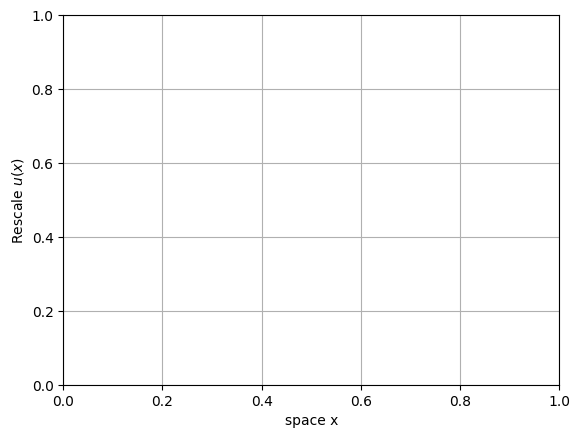

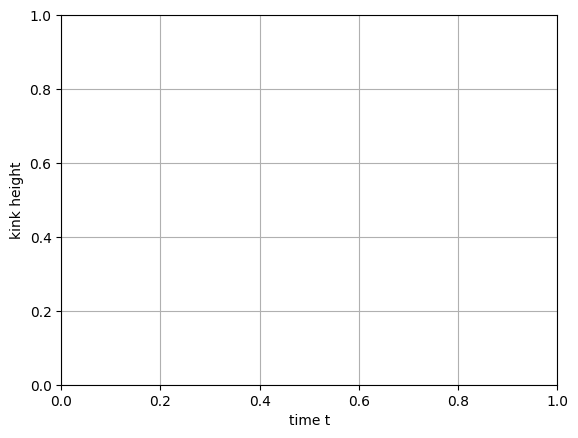

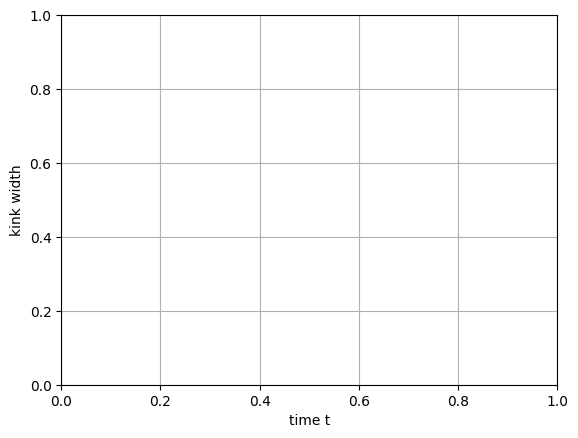

In [352]:
# Create plot object for u(x,t)
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("Rescale $u(x)$")
ax.set_yscale("linear")
ax.grid()

# Create plot object for height
fig_h, ax_h = plt.subplots()
ax_h.set_xscale("linear")
ax_h.set_xlabel("time t")
ax_h.set_ylabel("kink height")
ax_h.set_yscale("linear")
ax_h.grid()

# Create plot object for width
fig_w, ax_w = plt.subplots()
ax_w.set_xscale("linear")
ax_w.set_xlabel("time t")
ax_w.set_ylabel("kink width")
ax_w.set_yscale("linear")
ax_w.grid()

In [353]:
# Select the plot xspan
xmin = 46
xmax = 56

ts = [] # Instants t of the plots
Cs = [] # Values of C(t) at the instants of the plots
hs = [] # Values of the kink's height at the above instants
ws = [] # Values of the kink's width at the above instants

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    #print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            x = np.zeros(N)
            y = np.zeros(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            #print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    #x = x[0:i]
    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve (use it only if it is not empty)
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    if label != "":
        labell = label
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)
    #print("C^1/3 = "+str(C**(1/3)))

    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    #print(imin, imax)
    # If the evolution is adiabatic, we expect an analytical known shape,
    # So we rescale x and y to check if we see that shape
    
    # Rescale x
    x_resc = x[imin:imax-1]-(L/2)*np.ones(imax-imin-1)
    x_resc = x_resc*(np.sqrt(C/2))
    x_resc = x_resc+(L/2)*np.ones(imax-imin-1)
    # Rescale y
    y_resc = y[imin:imax-1]/np.sqrt(C)
    if np.abs(C) > 1e-5:   # If C=0 then the rescaled width is infinite!
        ax.plot(x_resc, y_resc, label = labell)

    # Measure height and width
    # Height
    i_height = int(len(x)/4)                           # CKECK w/ plot if there is Plateau at x=L/4 !!!
    height = 2*np.abs(y[i_height])
    if(y[i_height] < 0):
        print("Negative height!!!")
    # Width
    i_width = int(len(x)/2)
    while np.abs(y[i_width]) < (height/2)*np.tanh(1):
        #print(np.abs(y[i_width])-(height/2)*np.tanh(1))
        i_width = i_width + 1
    width = 2*(x[i_width]-L/2)

    ts.append(state_time)
    Cs.append(C)
    hs.append(height)
    ws.append(width)

#eps = 0.5
#plt.ylim(-1-eps,1+eps)

In [354]:
# TITLE

title = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
title= title + "\ndt = " + str(dt)
if T > 0:
    title = title + "\nC(t) = " + str(Cave) + " + " + str(A) + "$\sin{2\pi t/" + str(T) + "}$"
else:
    title = title + "\nC = " + str(Cave)
title = title + "\nL = " + str(round(N*dx,3))
title = title + "\ndx = " + str(round(dx,3))
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

# Custom title
#title = "C(t) = (a+b)/(b/Beta0^2-2at)\n a=-1 b=2 Beta0 = 1"
title = "T = 10; tau = 1"

ax.set_title(title)
ax_h.set_title(title)
ax_w.set_title(title)
#fig


#ax_h.plot(Cs, hs)
#fig_h
#ax_w.plot(Cs,ws)
#fig_w

Text(0.5, 1.0, 'T = 10; tau = 1')

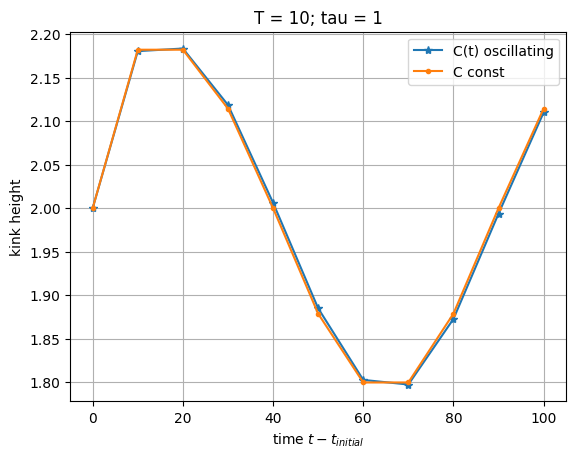

In [355]:
# Kink's height

# Reorder arrays
ts_, hs = zip(*sorted(zip(ts, hs)))
ts_, Cs = zip(*sorted(zip(ts, Cs)))

ax_h.plot(ts_-ts_[0]*np.ones(len(ts_)),hs,"-*",label="C(t) oscillating")
# Analytical if Adiabatic
ax_h.plot(ts_-ts_[0]*np.ones(len(ts_)), 2*np.sqrt(Cs),".-",label="C const")
ax_h.legend()
ax_h.set_xlabel("time $t-t_{initial}$")
ax_h.set_xscale("linear")
ax_h.set_yscale("linear")
fig_h

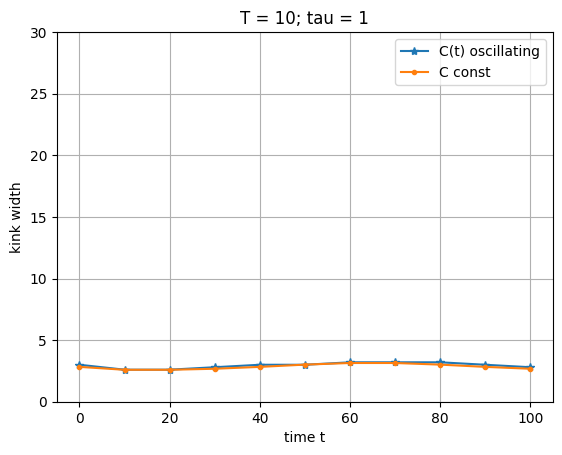

In [356]:
# Kink's width

# Reorder arrays
ts_, ws = zip(*sorted(zip(ts, ws)))


ax_w.plot(ts_-ts_[0]*np.ones(len(ts_)),ws,"*-",label="C(t) oscillating")
# Analytical if Adiabatic
reciprocalCs = np.zeros(len(Cs))
i = 0
for C in Cs:
    if (np.abs(C)) > 1e-5:
        reciprocalCs[i] = 1/C
    else:
        reciprocalCs[i] = 100000
    i = i + 1
ax_w.plot(ts_-ts_[0]*np.ones(len(ts_)), 2**(3/2)*np.sqrt(reciprocalCs),".-",label="C const")
ax_w.legend()
#ax_w.set_ylim(0,20)
ax_w.set_xscale("linear")
ax_w.set_yscale("linear")
#ax_w.set_xlim(0,300)
ax_w.set_ylim(0,30)


fig_w

Text(0, 0.5, 'C(t)')

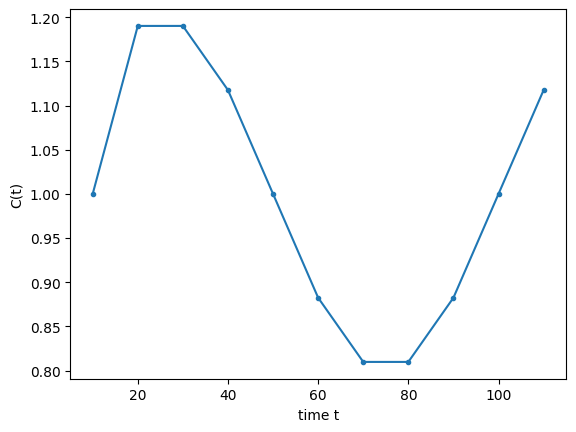

In [357]:
plt.plot(ts_,Cs,".-")
plt.xlabel("time t")
plt.ylabel("C(t)")

### Here we plot the state rescaled respect to the MEASURED alpha and beta.

To make a comparison with the Mathematica result

[Before we rescaled respect to C, in order to check Adiabaticity. Here we rescaled respect to the MEASURED height and width to check if the function u_k(\chi) is compatible with the ODE's numerical solution]

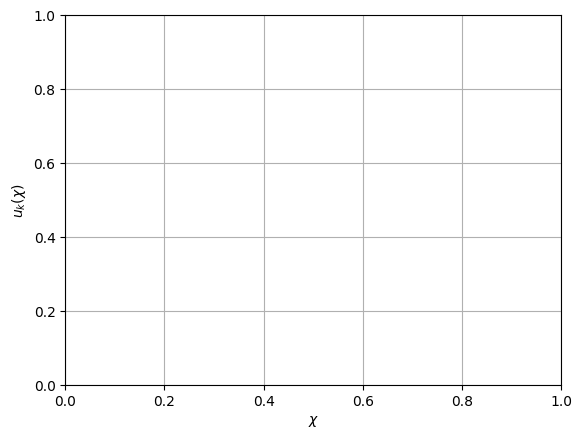

In [358]:
# Create plot object for u(x,t)
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("$\chi$")
ax.set_ylabel("$u_k(\chi)$")
ax.set_yscale("linear")
ax.grid()

In [359]:
# Select the plot xspan
xmin = 0
xmax = 1000

exp_index = 0   # Index of the experiment

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    #print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            x = np.zeros(N)
            y = np.zeros(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            #print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    #x = x[0:i]
    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    # Get custom label of the curve (use it only if it is not empty)
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    if label != "":
        labell = label
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)
    #print("C^1/3 = "+str(C**(1/3)))

    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    #print(imin, imax)
    # If the evolution is adiabatic, we expect an analytical known shape,
    # So we rescale x and y to check if we see that shape
    
    # Rescale x->\chi
    x_resc = x[imin:imax-1]-(L/2)*np.ones(imax-imin-1)
    x_resc = x_resc/(ws[exp_index]/2)
    x_resc = x_resc+(L/2)*np.ones(imax-imin-1)
    # Rescale u->u_k
    y_resc = y[imin:imax-1]/(hs[exp_index]/2)

    #if labell != "initial C = 1":
    ax.plot(x_resc, y_resc, label = labell)

    exp_index = exp_index + 1

#eps = 0.5
#plt.ylim(-1-eps,1+eps)

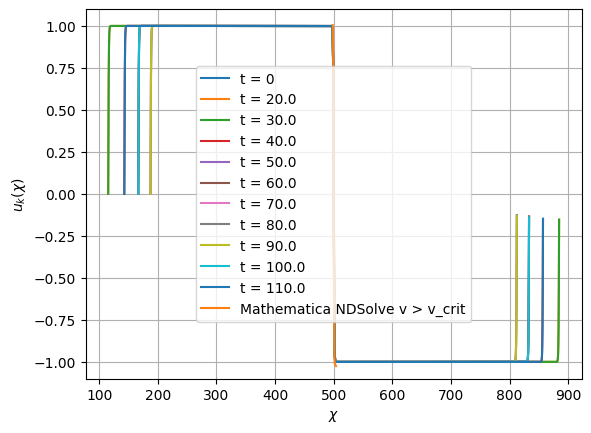

In [360]:
# Plot analytical solution
# Read the numerical solution of the ODE
f = open("../../misc/NDSolve u_k ODE a=-2 vel=1.33.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split("	")
    x[i] = float(a) + L/2
    y[i] = -float(b)
    i = i + 1

x = x[0:i]
y = y[0:i]

dx = 0.1
imin = int(len(x)/2 - 100)
imax = int(len(x)/2 + 100)
ax.plot(x[imin:imax], y[imin:imax], label = "Mathematica NDSolve v > v_crit")



ax.legend()
ax.set_ylim(-1.1,1.1)
fig

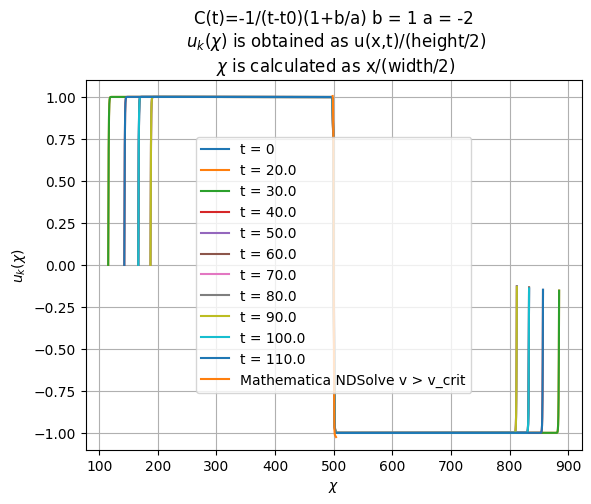

In [361]:
ax.set_title("C(t)=-1/(t-t0)(1+b/a) b = 1 a = -2\n $u_k(\chi)$ is obtained as u(x,t)/(height/2)\n $\chi$ is calculated as x/(width/2)")
fig